1. Генеруємо дані (x,y) навколо прямої y=9x+11

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

k = 9
b = 11

x = np.random.normal(5, 2, 500)
y = k*x+b + np.random.normal(5, 15, 500)
data = pd.DataFrame({'X': x, 'Y': y})

2. Візуалізуємо дані

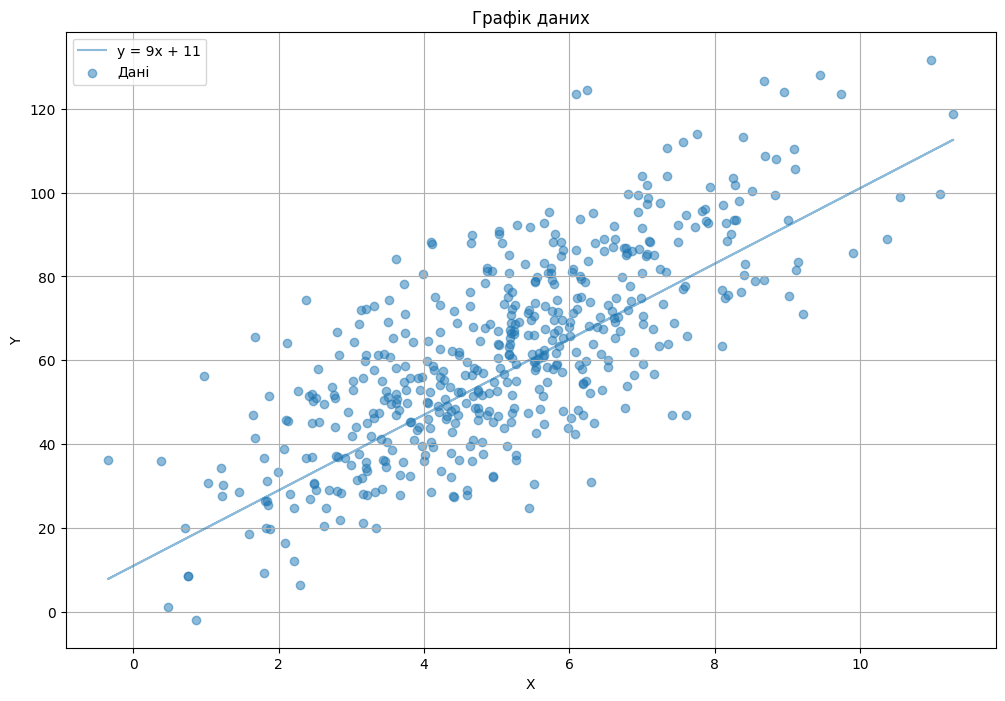

In [314]:
plt.figure(figsize=(12, 8))
plt.plot(x, k*x+b, alpha=0.5, label=f'y = {k}x + {b}')
plt.scatter(data.X, data.Y, alpha=0.5, label='Дані')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Графік даних')
plt.grid(True)

plt.show()

3. Метод Найменших Квадратів

In [315]:
def sqmeth(x, y):
    x_mean = sum(x) / len(x)
    y_mean = sum(y) / len(y)

    sum1 = sum((xi - x_mean) * (yi - y_mean) for xi, yi in zip(x, y))
    sum2 = sum((xi - x_mean) ** 2 for xi in x)

    k = sum1 / sum2
    b = y_mean - k * x_mean

    return k, b

print(f"Значення k: {k}")
print(f"Значення b: {b} \n")

k_LSM, b_LSM = sqmeth(data.X, data.Y)
print(f"Оптимальна оцінка k (LSM): {k_LSM}")
print(f"Оптимальна оцінка b (LSM): {b_LSM} \n")

k_POLY, b_POLY = np.polyfit(data.X, data.Y, 1)
print(f"Оптимальна оцінка k (POLY): {k_POLY}")
print(f"Оптимальна оцінка b (POLY): {b_POLY} \n")

Значення k: 9
Значення b: 11 

Оптимальна оцінка k (LSM): 8.764753333635085
Оптимальна оцінка b (LSM): 17.18863219021079 

Оптимальна оцінка k (POLY): 8.764753333635085
Оптимальна оцінка b (POLY): 17.18863219021082 



4. Візуалізуємо нові лінії

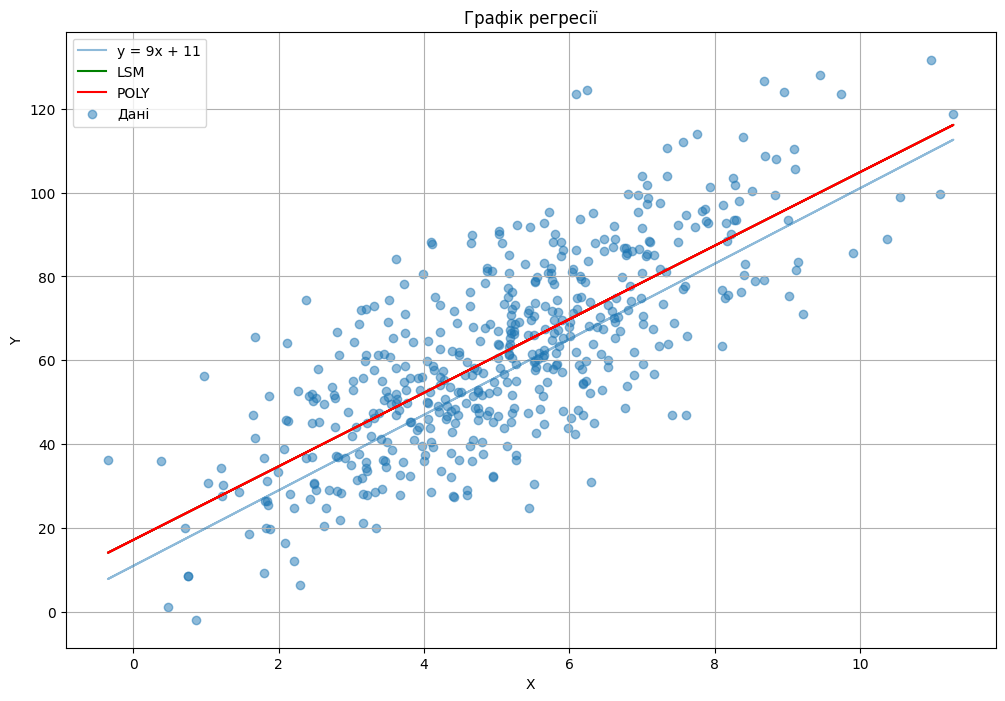

In [316]:
plt.figure(figsize=(12, 8))
plt.plot(x, k*x+b, alpha=0.5, label=f'y = {k}x + {b}')
plt.plot(x, k_LSM*x+b_LSM, color='green', label='LSM')
plt.plot(x, k_POLY*x+b_POLY, color='red', label='POLY')
plt.scatter(data.X, data.Y, alpha=0.5, label='Дані')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Графік регресії')
plt.grid(True)

plt.show()

5. Метод Градієнтного Спуску

In [317]:
def graddesc(x, y, learning_rate, n_iter):
    k = 0
    b = 0
    n = len(x)

    for _ in range(n_iter):

        predicted = k * x + b
        gradient_k = (-2/n) * sum(x * (y - predicted))
        gradient_b = (-2/n) * sum(y - predicted)

        k = k - learning_rate * gradient_k
        b = b - learning_rate * gradient_b

    return k, b

k_GRAD, b_GRAD = graddesc(data.X, data.Y, 0.01, 500)
print(f"Оптимальна оцінка k (GRAD): {k_GRAD}")
print(f"Оптимальна оцінка b (GRAD): {b_GRAD}")


Оптимальна оцінка k (GRAD): 9.513739823098051
Оптимальна оцінка b (GRAD): 12.831868940196948


6. Візуалізуємо нову лінію

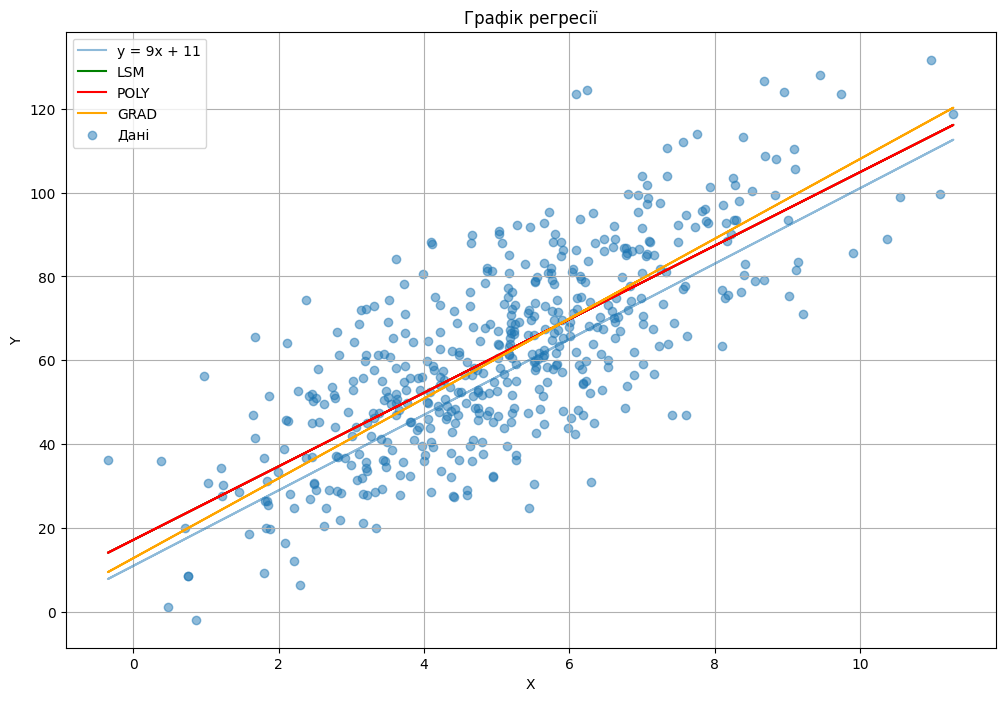

In [318]:
plt.figure(figsize=(12, 8))
plt.plot(x, k*x+b, alpha=0.5, label=f'y = {k}x + {b}')
plt.plot(x, k_LSM*x+b_LSM, color='green', label='LSM')
plt.plot(x, k_POLY*x+b_POLY, color='red', label='POLY')
plt.plot(x, k_GRAD*x+b_GRAD, color='orange', label='GRAD')
plt.scatter(data.X, data.Y, alpha=0.5, label='Дані')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Графік регресії')
plt.grid(True)

plt.show()

7. Залежність похибки від кількості операцій

In [321]:
def graddesciter():
    results = []

    for n_iter in range(300, 701, 10):

        k_GRAD, b_GRAD = graddesc(data.X, data.Y, 0.01, n_iter)

        error_k = abs(9 - k_GRAD)
        error_b = abs(11 - b_GRAD)

        results.append((n_iter, error_k, error_b))

    error_data = pd.DataFrame(results, columns=['Iterations', 'Error_k', 'Error_b'])
    return error_data

error_data = graddesciter()

8. Візуалізуємо залежність

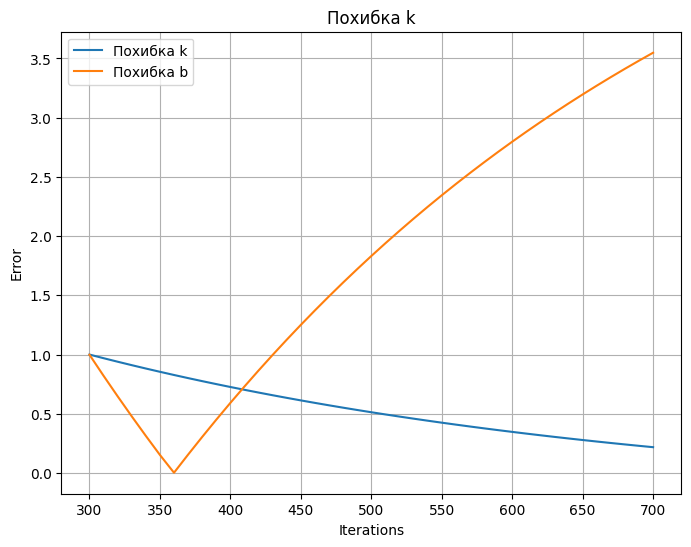

In [322]:
plt.figure(figsize=(8, 6))
plt.plot(error_data.Iterations, error_data.Error_k, label='Похибка k')
plt.plot(error_data.Iterations, error_data.Error_b, label='Похибка b')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Похибка k')
plt.grid(True)

plt.show()